In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
file_path = '/content/ERC20 Tokens.csv'  # Replace with your file path
df = pd.read_excel(file_path)

# Preview the dataset
print("Original Data:\n", df.head())

# Step 1: Handle Missing Values
# Fill numerical columns with 0 or their mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(0)

# Fill categorical columns with 'Unknown' or the mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Step 2: Normalize Numerical Data
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 3: Encode Categorical Data
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Step 4: Remove Duplicates (Optional)
df = df.drop_duplicates()

# Step 5: Save the Processed Data
output_file = 'processed_ERC20_Tokens.csv'
df.to_csv(output_file, index=False)

print("Preprocessing and normalization complete. Saved to", output_file)


Original Data:
                                     Transaction Hash   Status      Method  \
0  0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...  Success  0x771d503f   
1  0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...  Success  0x771d503f   
2  0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...  Success  0x771d503f   
3  0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...  Success  0x771d503f   
4  0x8daeb683103769d86cbab2a7b54c5037e788ac0cc88a...  Success  0x2213bc0b   

    BlockNo      DateTime (UTC)                                        From  \
0  21714476 2025-01-27 07:50:11  0x51c72848c68a965f66fa7a88855f9f7784502a7f   
1  21714476 2025-01-27 07:50:11  0x11b815efb8f581194ae79006d24e0d814b7697f6   
2  21714476 2025-01-27 07:50:11  0x51c72848c68a965f66fa7a88855f9f7784502a7f   
3  21714476 2025-01-27 07:50:11  0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640   
4  21714476 2025-01-27 07:50:11  0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6   

         From_Nametag                         

In [10]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
file_path = '/content/processed_ERC20_Tokens.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 1: Create a Graph from the Data
# Assuming 'From' and 'To' columns represent sender and receiver
G = nx.DiGraph()  # Directed graph
edges = df[['From', 'To']].values
G.add_edges_from(edges)

# Step 2: Calculate Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
closeness_centrality = nx.closeness_centrality(G)

# Step 3: Map Centrality Measures Back to the DataFrame
df['Degree Centrality'] = df['From'].map(degree_centrality).fillna(0)
df['Betweenness Centrality'] = df['From'].map(betweenness_centrality).fillna(0)
df['Closeness Centrality'] = df['From'].map(closeness_centrality).fillna(0)


# Step 4: Normalize Centrality Measures
centrality_cols = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']
scaler = MinMaxScaler()
df[centrality_cols] = scaler.fit_transform(df[centrality_cols])

# Step 5: Save the Updated Data
output_file = 'processed_with_centrality_ERC20_Tokens.csv'
df.to_csv(output_file, index=False)

print("Preprocessing with centrality measures complete. Saved to", output_file)


Preprocessing with centrality measures complete. Saved to processed_with_centrality_ERC20_Tokens.csv


In [12]:
print(df_preprocessed.columns)


Index(['Transaction Hash', 'Status', 'Method', 'BlockNo', 'DateTime (UTC)',
       'From', 'From_Nametag', 'To', 'To_Nametag', 'Amount', 'Value (USD)',
       'Token', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Degree Centrality',
       'Betweenness Centrality', 'Closeness Centrality'],
      dtype='object')


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the ERC20 dataset (normalised datset from sprint1 saved in csv format)
data_path = "/content/processed_with_centrality_ERC20_Tokens.csv"
df_preprocessed = pd.read_csv(data_path)

# Define features and data
features = [
    'From', 'From_Nametag', 'To', 'To_Nametag', 'Amount', 'Value (USD)',
       'Token', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Degree Centrality',
       'Betweenness Centrality', 'Closeness Centrality'
]
X = df_preprocessed[features]





In [18]:
def plot_scatter(model_name, preds, color, x_feature, y_feature):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[x_feature], X[y_feature],
                c=[color if p == 1 else "gray" for p in preds], alpha=0.5)
    plt.title(f"Anomalies Detected by {model_name}")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(["Anomaly", "Normal"], loc="upper right")
    plt.show()

    # Metrics for each model
models = {
    "Isolation Forest": iso_preds,
    "Local Outlier Factor": lof_preds,
    "One-Class SVM": svm_preds,
    "Ensemble Voting": ensemble_preds
}

In [15]:
# 1. Isolation Forest
print("\n Isolation Forest")
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
iso_preds = isolation_forest.fit_predict(X)
iso_preds = np.where(iso_preds == -1, 1, 0)
print(f"Anomalies Detected (Isolation Forest): {sum(iso_preds)}")

# 2. Local Outlier Factor
print("\n Local Outlier Factor")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_preds = lof.fit_predict(X)
lof_preds = np.where(lof_preds == -1, 1, 0)
print(f"Anomalies Detected (LOF): {sum(lof_preds)}")

# 3. One-Class SVM
print("\n One-Class SVM")
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
one_class_svm.fit(X)
svm_preds = one_class_svm.predict(X)
svm_preds = np.where(svm_preds == -1, 1, 0)
print(f"Anomalies Detected (One-Class SVM): {sum(svm_preds)}")


 Isolation Forest
Anomalies Detected (Isolation Forest): 68

 Local Outlier Factor
Anomalies Detected (LOF): 68

 One-Class SVM
Anomalies Detected (One-Class SVM): 65


In [19]:
# Calculate Overlap of Anomalies
overlap = (iso_preds + lof_preds + svm_preds) >= 2
print(f"Overlap of Anomalies (Detected by 2+ models): {sum(overlap)}")

# Overlap Analysis
iso_lof_overlap = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 0))
lof_svm_overlap = sum((lof_preds == 1) & (svm_preds == 1) & (iso_preds == 0))
iso_svm_overlap = sum((iso_preds == 1) & (svm_preds == 1) & (lof_preds == 0))
all_three_overlap = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 1))

print(f"Overlap between Isolation Forest and LOF: {iso_lof_overlap}")
print(f"Overlap between LOF and SVM: {lof_svm_overlap}")
print(f"Overlap between Isolation Forest and SVM: {iso_svm_overlap}")
print(f"Overlap among all three models: {all_three_overlap}")

Overlap of Anomalies (Detected by 2+ models): 31
Overlap between Isolation Forest and LOF: 4
Overlap between LOF and SVM: 20
Overlap between Isolation Forest and SVM: 6
Overlap among all three models: 1


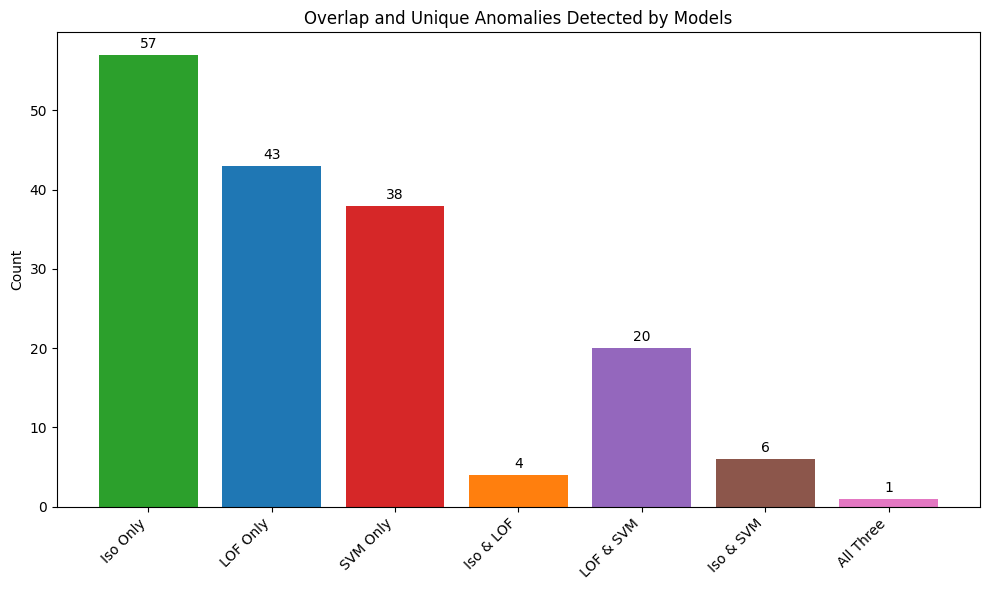

In [20]:
# Overlap and Unique Anomalies Bar Chart
unique_iso = sum((iso_preds == 1) & (lof_preds == 0) & (svm_preds == 0))
unique_lof = sum((lof_preds == 1) & (iso_preds == 0) & (svm_preds == 0))
unique_svm = sum((svm_preds == 1) & (iso_preds == 0) & (lof_preds == 0))
overlap_iso_lof = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 0))
overlap_lof_svm = sum((lof_preds == 1) & (svm_preds == 1) & (iso_preds == 0))
overlap_iso_svm = sum((iso_preds == 1) & (svm_preds == 1) & (lof_preds == 0))
overlap_all = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 1))

overlap_data = {
    "Iso Only": unique_iso,
    "LOF Only": unique_lof,
    "SVM Only": unique_svm,
    "Iso & LOF": overlap_iso_lof,
    "LOF & SVM": overlap_lof_svm,
    "Iso & SVM": overlap_iso_svm,
    "All Three": overlap_all
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(overlap_data.keys(), overlap_data.values(), color=['#2ca02c', '#1f77b4', '#d62728',
                                                                  '#ff7f0e', '#9467bd', '#8c564b', '#e377c2'])
plt.title("Overlap and Unique Anomalies Detected by Models")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Add counts above the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [21]:
# 4. Ensemble Voting
print("\n Ensemble Voting")
ensemble_votes = iso_preds + lof_preds + svm_preds
ensemble_preds = np.where(ensemble_votes >= 2, 1, 0)
print(f"Anomalies Detected (Ensemble Voting): {sum(ensemble_preds)}")



 Ensemble Voting
Anomalies Detected (Ensemble Voting): 31


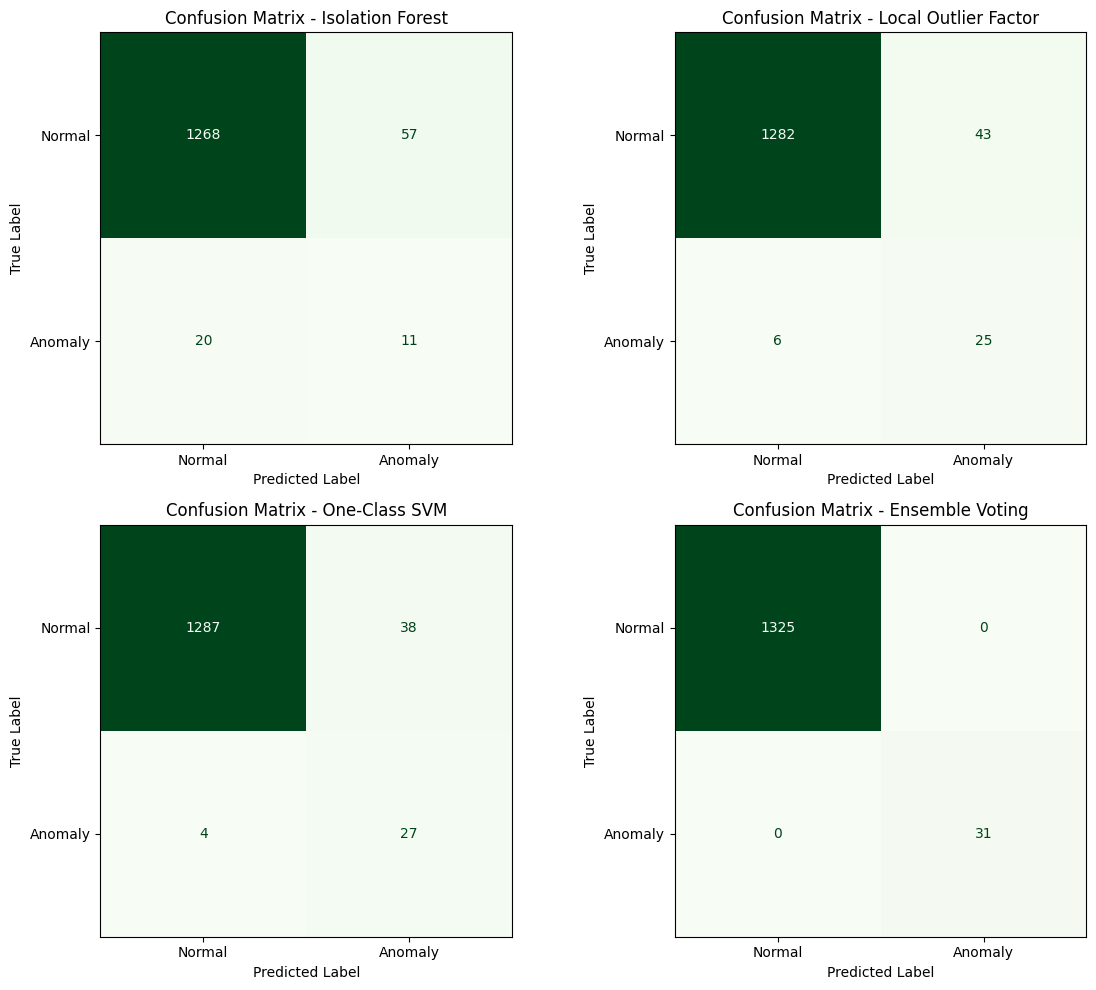

In [22]:
# Confusion Matrices
models = {
    "Isolation Forest": iso_preds,
    "Local Outlier Factor": lof_preds,
    "One-Class SVM": svm_preds,
    "Ensemble Voting": ensemble_preds
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

for idx, (model_name, preds) in enumerate(models.items()):
    cm = confusion_matrix(ensemble_preds, preds)  # Compare against ensemble voting predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
    disp.plot(ax=axes[idx], colorbar=False, cmap="Greens")  # Use the 'Greens' colormap
    axes[idx].set_title(f"Confusion Matrix - {model_name}")
    axes[idx].set_xlabel("Predicted Label")  # Add labels for clarity
    axes[idx].set_ylabel("True Label")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


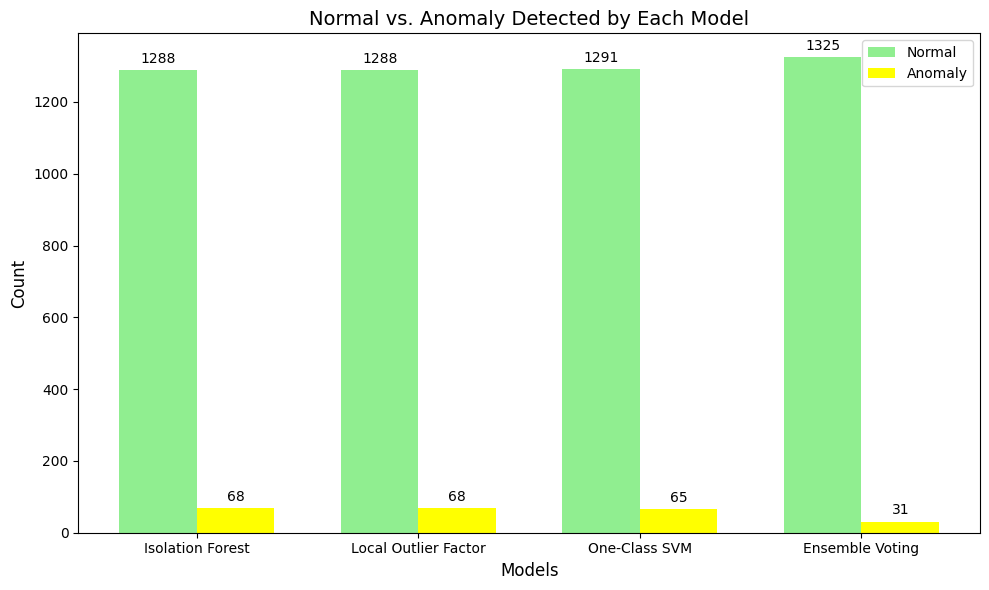

In [23]:
# Generate data for normal vs. anomaly counts for each model
model_names = ["Isolation Forest", "Local Outlier Factor", "One-Class SVM", "Ensemble Voting"]
normal_counts = [len(iso_preds) - sum(iso_preds), len(lof_preds) - sum(lof_preds),
                 len(svm_preds) - sum(svm_preds), len(ensemble_preds) - sum(ensemble_preds)]
anomaly_counts = [sum(iso_preds), sum(lof_preds), sum(svm_preds), sum(ensemble_preds)]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width / 2, normal_counts, bar_width, label='Normal', color='lightgreen')
bars2 = ax.bar(x + bar_width / 2, anomaly_counts, bar_width, label='Anomaly', color='yellow')

# Add titles and labels
ax.set_title("Normal vs. Anomaly Detected by Each Model", fontsize=14)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=0, fontsize=10)
ax.legend()

# Annotate the bars with counts
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


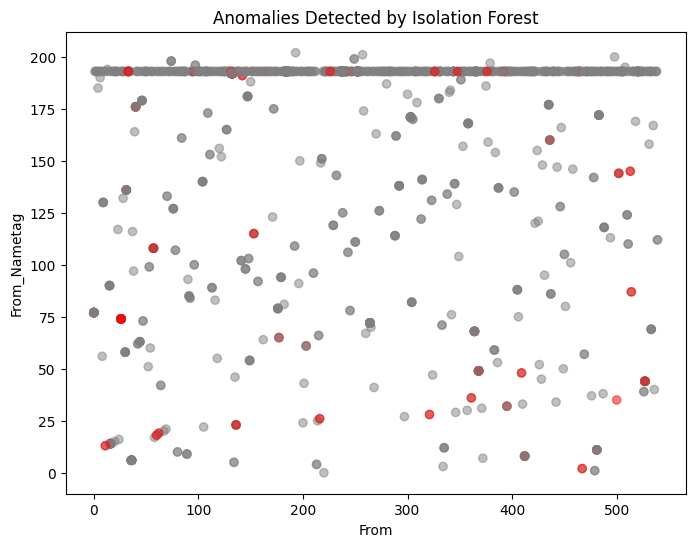

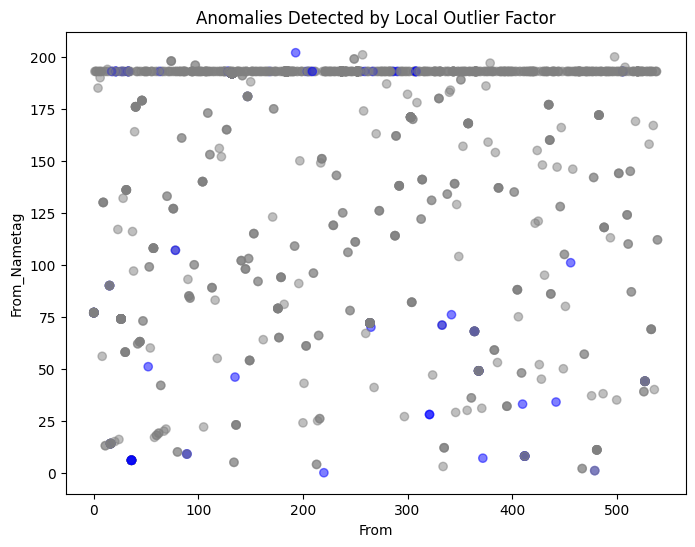

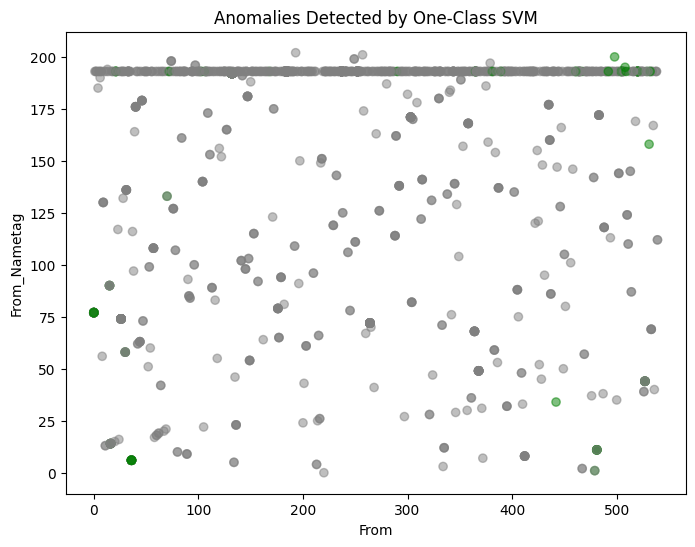

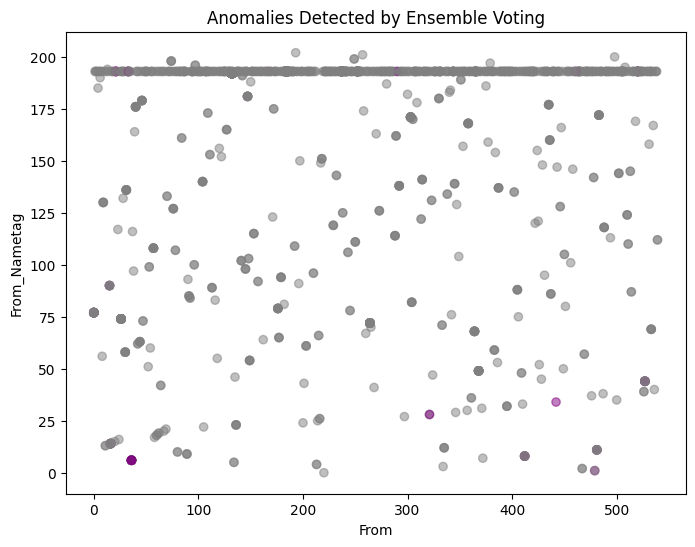

In [24]:
# Scatter plot of anomalies
colors = {
    "Isolation Forest": 'red',
    "Local Outlier Factor": 'blue',
    "One-Class SVM": 'green',
    "Ensemble Voting": 'purple'
}
for model_name, preds in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=[colors[model_name] if p == 1 else 'gray' for p in preds], alpha=0.5)
    plt.title(f"Anomalies Detected by {model_name}")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

In [25]:
# Metrics for each model
metrics = {}
for model_name, preds in models.items():
    report = classification_report(ensemble_preds, preds, output_dict=True)
    metrics[model_name] = {
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1 Score": report['1']['f1-score']
    }

# Display Metrics
metrics_df = pd.DataFrame(metrics).T
print("\n Metrics :")
print(metrics_df)


 Metrics :
                      Precision    Recall  F1 Score
Isolation Forest       0.161765  0.354839  0.222222
Local Outlier Factor   0.367647  0.806452  0.505051
One-Class SVM          0.415385  0.870968  0.562500
Ensemble Voting        1.000000  1.000000  1.000000


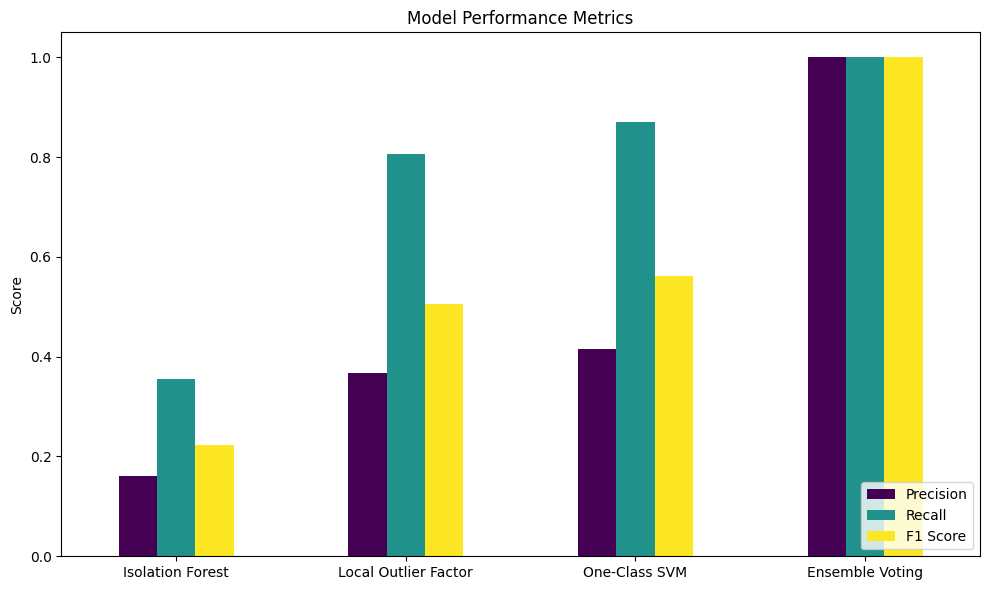

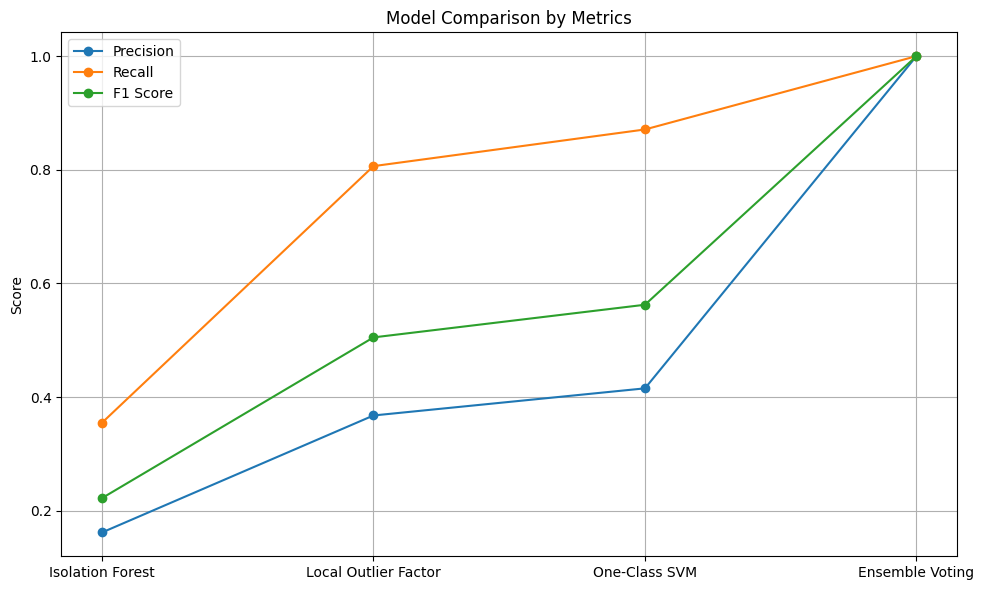

In [26]:
# Visualizing Metrics
metrics_df.plot(kind='bar', figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
# Comparison Chart between Models
for metric in ["Precision", "Recall", "F1 Score"]:
    metrics_df[metric].plot(kind='line', marker='o', figsize=(10, 6), label=metric)
plt.title("Model Comparison by Metrics")
plt.ylabel("Score")
plt.xticks(range(len(metrics_df.index)), metrics_df.index, rotation=0)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()